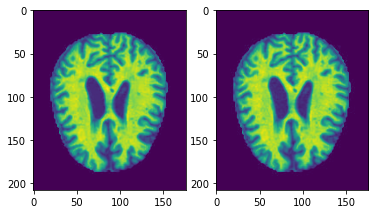

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('29.jpg',0)
dst = cv2.fastNlMeansDenoising(img)
plt.subplot(121), plt.imshow(dst)
plt.subplot(122), plt.imshow(img)
plt.show()

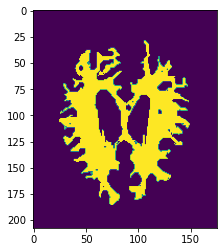

In [3]:
class Point(object):
 def __init__(self,x,y):
  self.x = x
  self.y = y

 def getX(self):
  return self.x
 def getY(self):
  return self.y

def getGrayDiff(img,currentPoint,tmpPoint):
 return abs(int(img[currentPoint.x,currentPoint.y]) - int(img[tmpPoint.x,tmpPoint.y]))

def selectConnects(p):
 if p != 0:
  connects = [Point(-1, -1), Point(0, -1), Point(1, -1), Point(1, 0), Point(1, 1), \
     Point(0, 1), Point(-1, 1), Point(-1, 0)]
 else:
  connects = [ Point(0, -1), Point(1, 0),Point(0, 1), Point(-1, 0)]
 return connects

def regionGrow(img,seeds,thresh,p = 1):
 height, weight = img.shape
 seedMark = np.zeros(img.shape)
 seedList = []
 for seed in seeds:
  seedList.append(seed)
 label = 1
 connects = selectConnects(p)
 while(len(seedList)>0):
  currentPoint = seedList.pop(0)

  seedMark[currentPoint.x,currentPoint.y] = label
  for i in range(8):
   tmpX = currentPoint.x + connects[i].x
   tmpY = currentPoint.y + connects[i].y
   if tmpX < 0 or tmpY < 0 or tmpX >= height or tmpY >= weight:
    continue
   grayDiff = getGrayDiff(img,currentPoint,Point(tmpX,tmpY))
   if grayDiff < thresh and seedMark[tmpX,tmpY] == 0:
    seedMark[tmpX,tmpY] = label
    seedList.append(Point(tmpX,tmpY))
 return seedMark


img = cv2.imread('29.jpg',0)
seeds = [Point(104,25)]
binaryImg = regionGrow(img,seeds,9)
plt.imshow(binaryImg)

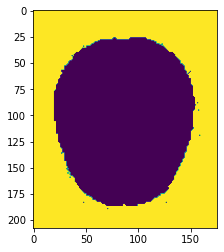

In [4]:
seeds = [Point(0,0)]
binaryImg2 = regionGrow(img,seeds,9)
plt.imshow(binaryImg2)